# 1. Setup

In [1]:
import tensorflow as tf
import pandas as pd
import os

In [2]:
metadata = pd.read_csv("C:/Users/luisp/OneDrive/Mestrado/1ano/2sem/Deep Learning (DL)/Project/rare_species 1/metadata.csv")

In [3]:
metadata

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...
...,...,...,...,...,...,...,...
11978,1fa96ea5-32fa-4a25-b8d2-fa99f6e2cb89,29734618,1011315,animalia,chordata,leporidae,chordata_leporidae/29734618_1011315_eol-full-s...
11979,628bf2b4-6ecc-4017-a8e6-4306849e0cfc,29972861,1056842,animalia,chordata,emydidae,chordata_emydidae/29972861_1056842_eol-full-si...
11980,0ecfdec9-b1cd-4d43-96fc-2f8889ec1ad9,30134195,52572074,animalia,chordata,dasyatidae,chordata_dasyatidae/30134195_52572074_eol-full...
11981,27fdb1e9-c5fb-459a-8b6a-6fb222b1c512,9474963,46559139,animalia,chordata,mustelidae,chordata_mustelidae/9474963_46559139_eol-full-...


In [4]:
metadata.shape

(11983, 7)

In [5]:
metadata.columns

Index(['rare_species_id', 'eol_content_id', 'eol_page_id', 'kingdom', 'phylum',
       'family', 'file_path'],
      dtype='object')

In [6]:
# Checking the different numbers of families that exist
len(metadata["family"].unique())

202

In [7]:
# Important no Proj
## Data pre processing, image transformations
## Design deep Learning Models
## Utilize the pre-trained models and correctly adapt them to your task
## Amount and quality of innovative approaches implemented

# CHAT
#   |
#   |
#   v

## Fase 1

In [8]:
import pandas as pd

# Carrega o CSV
metadata = pd.read_csv("C:/Users/luisp/OneDrive/Mestrado/1ano/2sem/Deep Learning (DL)/Project/rare_species 1/metadata.csv")

# Visualiza o que está lá
metadata.head()

,rare_species_id,eol_content_id,eol_page_id,kingdom,phylum,family,file_path
0,75fd91cb-2881-41cd-88e6-de451e8b60e2,12853737,449393,animalia,mollusca,unionidae,mollusca_unionidae/12853737_449393_eol-full-si...
1,28c508bc-63ff-4e60-9c8f-1934367e1528,20969394,793083,animalia,chordata,geoemydidae,chordata_geoemydidae/20969394_793083_eol-full-...
2,00372441-588c-4af8-9665-29bee20822c0,28895411,319982,animalia,chordata,cryptobranchidae,chordata_cryptobranchidae/28895411_319982_eol-...
3,29cc6040-6af2-49ee-86ec-ab7d89793828,29658536,45510188,animalia,chordata,turdidae,chordata_turdidae/29658536_45510188_eol-full-s...
4,94004bff-3a33-4758-8125-bf72e6e57eab,21252576,7250886,animalia,chordata,indriidae,chordata_indriidae/21252576_7250886_eol-full-s...


In [9]:
import os
import pandas as pd

# Caminho base onde estão as pastas com imagens
base_image_dir = 'C:/Users/luisp/OneDrive/Mestrado/1ano/2sem/Deep Learning (DL)/Project/rare_species 1'

# Criar coluna com caminho absoluto para cada imagem
metadata['absolute_path'] = metadata['file_path'].apply(lambda x: os.path.join(base_image_dir, x))

# Verificar se o ficheiro existe no disco
metadata['exists_on_disk'] = metadata['absolute_path'].apply(os.path.exists)

# Mostrar quantos existem e quantos faltam
total_in_metadata = len(metadata)
existing_on_disk = metadata['exists_on_disk'].sum()
real_images_on_disk = sum(len(files) for _, _, files in os.walk(base_image_dir))

print(f"Total de imagens no metadata: {total_in_metadata}")
print(f"Total de imagens que existem no disco: {existing_on_disk}")
print(f"Total real de ficheiros de imagem no disco: {real_images_on_disk}")

# Mostrar exemplos de imagens em falta
print("\nExemplos de imagens em falta:")
print(metadata[~metadata['exists_on_disk']][['file_path']].head())

# Remover entradas com ficheiros em falta
metadata_clean = metadata[metadata['exists_on_disk']].drop(columns=['exists_on_disk'])

# Guardar novo ficheiro limpo
metadata_clean.to_csv("C:/Users/luisp/OneDrive/Mestrado/1ano/2sem/Deep Learning (DL)/Project/rare_species 1/metadata_clean.csv", index=False)

print("\n✅ metadata_clean.csv guardado com sucesso — apenas com imagens existentes.")

Total de imagens no metadata: 11983
Total de imagens que existem no disco: 11946
Total real de ficheiros de imagem no disco: 11948

Exemplos de imagens em falta:
                                              file_path
65    chordata_percidae/2702997_211786_eol-full-size...
1662  chordata_laridae/30123070_45516169_eol-full-si...
1675  arthropoda_carabidae/28933425_2867406_eol-full...
2062  arthropoda_carabidae/27782880_2867406_eol-full...
2109  chordata_callitrichidae/29473109_323892_eol-fu...

✅ metadata_clean.csv guardado com sucesso — apenas com imagens existentes.


In [10]:
from sklearn.preprocessing import LabelEncoder

# Codificar a coluna 'family'
label_encoder = LabelEncoder()
metadata_clean['label_encoded'] = label_encoder.fit_transform(metadata_clean['family'])

# Guarda a lista de labels para decodificar mais tarde se precisares
label_map = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Visualiza
metadata_clean[['family', 'label_encoded']].drop_duplicates()

,family,label_encoded
0,unionidae,193
1,geoemydidae,84
2,cryptobranchidae,56
3,turdidae,192
4,indriidae,100
...,...,...
1421,cyprinodontidae,59
1450,cacatuidae,28
1536,balaenidae,19
1600,alligatoridae,7


In [11]:
from sklearn.model_selection import train_test_split

# Split inicial: treino (70%) e resto (30%)
train_df, temp_df = train_test_split(metadata_clean, test_size=0.3, stratify=metadata_clean['label_encoded'], random_state=42)

# Segundo split: validação (15%) e teste (15%)
val_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label_encoded'], random_state=42)

# Verifica o tamanho de cada split
print(f"Treino: {len(train_df)} | Validação: {len(val_df)} | Teste: {len(test_df)}")

Treino: 8362 | Validação: 1792 | Teste: 1792


In [12]:
# Fase 1 - Passo 4 - Opcional
import os

# Cria a coluna com caminho absoluto
for df in [train_df, val_df, test_df]:
    df['absolute_path'] = df['file_path'].apply(lambda x: os.path.normpath(os.path.join(base_image_dir, x)))

In [13]:
# Fase 1 - Passo 5 - Opcional

# train_df.to_csv("train_split.csv", index=False)
# val_df.to_csv("val_split.csv", index=False)
# test_df.to_csv("test_split.csv", index=False)

## Fase 2


In [14]:
# Fase 2 - Passo 1
import tensorflow as tf

# Parâmetros principais
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE

In [15]:
# Fase 2 - Passo 3
# Função para carregar e processar uma imagem
def load_image(image_path, label):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, IMG_SIZE)
    image = tf.cast(image, tf.float32) / 255.0  # Normaliza para [0, 1]
    return image, label

# Data augmentation (apenas para treino)
def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    return image, label

In [16]:
# Fase 2 - Passo 4
def prepare_dataset(df, augment_data=False, shuffle=False):
    paths = df['absolute_path'].values
    labels = df['label_encoded'].values

    dataset = tf.data.Dataset.from_tensor_slices((paths, labels))
    dataset = dataset.map(load_image, num_parallel_calls=AUTOTUNE)

    if augment_data:
        dataset = dataset.map(augment, num_parallel_calls=AUTOTUNE)
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)

    dataset = dataset.batch(BATCH_SIZE).prefetch(AUTOTUNE)
    return dataset

# Criar os 3 datasets
train_dataset = prepare_dataset(train_df, augment_data=True, shuffle=True)
val_dataset = prepare_dataset(val_df)
test_dataset = prepare_dataset(test_df)


## Fase 3

In [17]:
# Fase 3 - Passo 1

from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# Número de classes
NUM_CLASSES = train_df['label_encoded'].nunique()

base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # para começar com Transfer Learning

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

# 🔓 Descongelar apenas as últimas camadas do modelo base
base_model.trainable = True

# Congelar as primeiras camadas e deixar só as últimas 20 treináveis
for layer in base_model.layers[:-20]:
    layer.trainable = False

# ✅ Criar a "cabeça" do modelo
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
output = Dense(NUM_CLASSES, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

# ⚠️ Recompilar com learning rate reduzida
model.compile(optimizer=Adam(learning_rate=1e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# (Opcional) Ver resumo do modelo
# model.summary()


In [19]:
# Fase 3 - Passo 3

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callbacks
callbacks = [
    EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True),
    ModelCheckpoint("best_model.h5", save_best_only=True)
]

# Treino
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=60,
    callbacks=callbacks
)

Epoch 1/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 736ms/step - accuracy: 0.0121 - loss: 5.3083

262/262 ━━━━━━━━━━━━━━━━━━━━ 261s 906ms/step - accuracy: 0.0121 - loss: 5.3082 - val_accuracy: 0.0179 - val_loss: 5.2941
Epoch 2/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 793ms/step - accuracy: 0.0259 - loss: 5.1865

262/262 ━━━━━━━━━━━━━━━━━━━━ 252s 948ms/step - accuracy: 0.0259 - loss: 5.1864 - val_accuracy: 0.0296 - val_loss: 5.1282
Epoch 3/60
262/262 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.0374 - loss: 5.1014

262/262 ━━━━━━━━━━━━━━━━━━━━ 252s 946ms/step - accuracy: 0.0374 - loss: 5.1014 - val_accuracy: 0.0424 - val_loss: 5.0471
Epoch 4/60
 18/262 ━━━━━━━━━━━━━━━━━━━━ 3:13 792ms/step - accuracy: 0.0434 - loss: 5.0429

KeyboardInterrupt: 

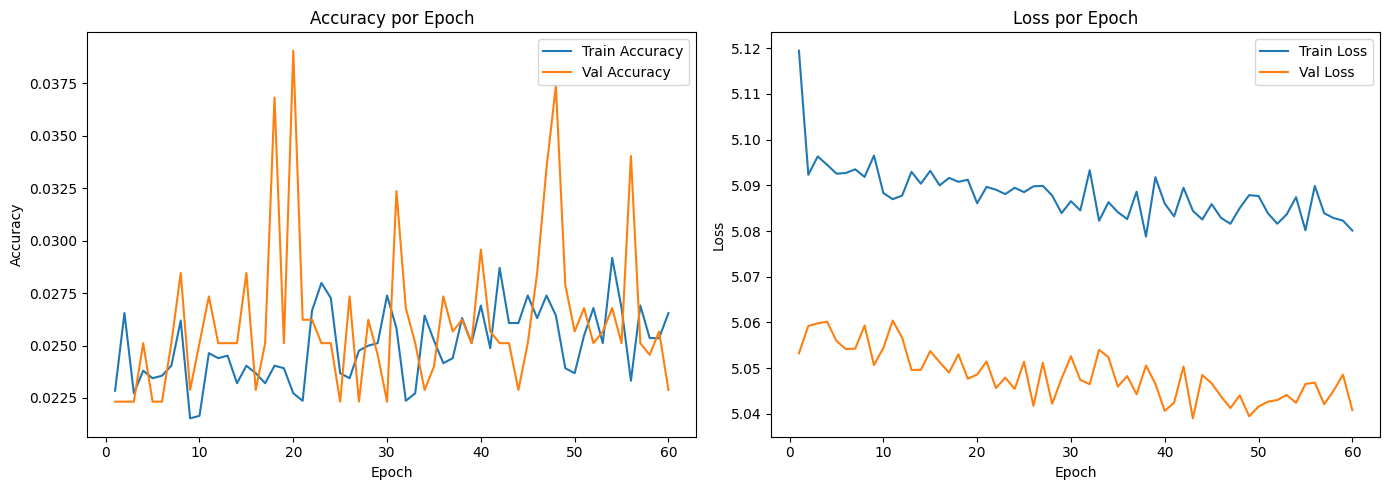

In [ ]:
import matplotlib.pyplot as plt

# A variável 'history' deve vir de:
# history = model.fit(...)

# Obtemos o histórico dos valores de loss e accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(acc) + 1)

# Criar os gráficos
plt.figure(figsize=(14, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Val Accuracy')
plt.title('Accuracy por Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.title('Loss por Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Fase 3 - Passo 3

# Avaliação final
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")

56/56 ━━━━━━━━━━━━━━━━━━━━ 19s 337ms/step - accuracy: 0.0241 - loss: 5.0592
Test accuracy: 0.0251


In [ ]:
test_dataset = prepare_dataset(test_df)

# Avaliação no conjunto de teste
results = model.evaluate(
    test_dataset,
    return_dict=True,
    verbose=1  # mostra progresso
)

# Mostrar resultados
print("\n📊 Avaliação no conjunto de teste:")
for metric, value in results.items():
    print(f"{metric}: {value:.4f}")


56/56 ━━━━━━━━━━━━━━━━━━━━ 18s 319ms/step - accuracy: 0.0241 - loss: 5.0592

📊 Avaliação no conjunto de teste:
accuracy: 0.0251
loss: 5.0374


# TESTES

In [ ]:
from pathlib import Path

# Filtrar apenas imagens existentes
for df_name, df in zip(['train_df', 'val_df', 'test_df'], [train_df, val_df, test_df]):
    df = df[df['absolute_path'].apply(lambda x: Path(x).exists())].reset_index(drop=True)
    globals()[df_name] = df  # Atualiza a variável no namespace global

In [ ]:
from pathlib import Path

# Função para verificar imagens existentes
def verificar_caminhos(df, nome_split):
    total = len(df)
    caminhos_validos = df['absolute_path'].apply(lambda x: Path(x).exists())
    num_validos = caminhos_validos.sum()
    num_invalidos = total - num_validos

    print(f"🔍 {nome_split}:")
    print(f"  Total de imagens:       {total}")
    print(f"  Caminhos válidos:       {num_validos}")
    print(f"  Caminhos inválidos:     {num_invalidos}")
    print("-" * 40)

# Verificar cada split
verificar_caminhos(train_df, "Treino")
verificar_caminhos(val_df, "Validação")
verificar_caminhos(test_df, "Teste")


🔍 Treino:
  Total de imagens:       8362
  Caminhos válidos:       8362
  Caminhos inválidos:     0
----------------------------------------
🔍 Validação:
  Total de imagens:       1792
  Caminhos válidos:       1792
  Caminhos inválidos:     0
----------------------------------------
🔍 Teste:
  Total de imagens:       1792
  Caminhos válidos:       1792
  Caminhos inválidos:     0
----------------------------------------


In [ ]:
from pathlib import Path

# Caminho base das imagens
base_dir = Path('C:/Users/luisp/OneDrive/Mestrado/1ano/2sem/Deep Learning (DL)/Project/rare_species 1')

# Função para contar imagens nas pastas físicas (disco)
def contar_imagens_pasta(base_path):
    return len(list(base_path.glob("*/*.jpg")))  # procura .jpg nas subpastas

# Função para verificar caminhos válidos na metadata
def verificar_caminhos(df, nome_split):
    total_metadata = len(df)
    caminhos_validos = df['absolute_path'].apply(lambda x: Path(x).exists())
    num_validos = caminhos_validos.sum()
    num_invalidos = total_metadata - num_validos

    print(f"🔍 {nome_split}:")
    print(f"  Total de caminhos na metadata:    {total_metadata}")
    print(f"  Caminhos válidos (existem):       {num_validos}")
    print(f"  Caminhos inválidos (faltam):      {num_invalidos}")
    print("-" * 40)

# 📦 Totais globais
total_imagens_disco = contar_imagens_pasta(base_dir)
total_metadata_global = len(train_df) + len(val_df) + len(test_df)

print(f"📂 Total de imagens existentes no disco: {total_imagens_disco}")
print(f"🗂️  Total de caminhos na metadata (todos os splits): {total_metadata_global}")
print("=" * 50)

# Verificar os splits
verificar_caminhos(train_df, "Treino")
verificar_caminhos(val_df, "Validação")
verificar_caminhos(test_df, "Teste")

📂 Total de imagens existentes no disco: 11946
🗂️  Total de caminhos na metadata (todos os splits): 11946
🔍 Treino:
  Total de caminhos na metadata:    8362
  Caminhos válidos (existem):       8362
  Caminhos inválidos (faltam):      0
----------------------------------------
🔍 Validação:
  Total de caminhos na metadata:    1792
  Caminhos válidos (existem):       1792
  Caminhos inválidos (faltam):      0
----------------------------------------
🔍 Teste:
  Total de caminhos na metadata:    1792
  Caminhos válidos (existem):       1792
  Caminhos inválidos (faltam):      0
----------------------------------------


In [ ]:
def verificar_caminhos_duplicados(df, nome_split):
    duplicados = df[df.duplicated(subset='absolute_path', keep=False)]
    num_duplicados = len(duplicados)

    print(f"🔁 {nome_split}:")
    print(f"  Caminhos duplicados: {num_duplicados}")
    if num_duplicados > 0:
        print("  Exemplos:")
        print(duplicados[['absolute_path', 'label_encoded']].head())
    print("-" * 40)

verificar_caminhos_duplicados(train_df, "Treino")
verificar_caminhos_duplicados(val_df, "Validação")
verificar_caminhos_duplicados(test_df, "Teste")


🔁 Treino:
  Caminhos duplicados: 0
----------------------------------------
🔁 Validação:
  Caminhos duplicados: 0
----------------------------------------
🔁 Teste:
  Caminhos duplicados: 0
----------------------------------------
